# Task 0

## Choosing variant

In [14]:
N = ord('V') % 3 + 1
print('Variant for lab 1 is ' + str(N))

Variant for lab 1 is 3


# Task 1

## function that takes a file name and a column name as a parameter and returns a numpy array with column values. 

In [243]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

def file_to_array(file_name, col_name) :
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        column_index = headers.index(col_name)
        return np.array([row[column_index] for row in reader])

# Task 2 

## using the function from the previous task, creating a numpy array of the values of the "APC" 

In [245]:
APC_data = file_to_array('russia_losses_equipment.csv', 'APC')

# Task3 
### daily losses of APCs

In [72]:
def daily_losses(total_losses_array):
    total_losses_array = total_losses_array.astype(int)
    daily_losses_array = np.diff(total_losses_array, prepend=total_losses_array[0])
    return daily_losses_array * -1

print('Day losses: ')
daily_losses_array = daily_losses(APC_data)
print(daily_losses_array)

Day losses: 
[  0  38  42  52  40  12  40  30  52  38  39  13   3   6   8  20  40  48
  17  13  19   9  19   0   9  21  27  35  26  24  14  23  18  14  19  17
  11  21  32  25  21  26  15   7  12  35  24  17  17   5  13   9   9   9
  29   8  31  17  27   8  42  20  38   8  21  24  11  26  13  20  17  46
  15  19  12   9  36  15  32  24  23  17  11  19  40  16  18  11  17  17
  16  26  19  25  21   9  19  18  15  15  11  35  18  12  20  18   6  29
  26  21  11  32  13  26   9  20  40  16  18  22  33  12  22  22  33  40
  15  17  11  27  27  22  34  35  35  43  14  30  48  43  42  22  40  32
  35  19  14  34  23  27  33  29  21  39  16  20  14  15  14  12  12   8
  23  21  17   8  18  13  31  20  47  19  12  47  45  24  54  38  73  18
  18  29  17  20  20  27  21   9  24  25  28  19  37  16   9  35  17  24
  24  11  17  20  27  24  27  25  19  51  40  28  21  28  29  30  44  14
  16  37  16  15  37  35  70  36  34  53  16  39  47  39  27  21  14  21
  22  20  22  35   4  13  13  19  16  

# Task4
### 5 biggest daily losses

In [74]:
print(np.sort(daily_losses_array)[-5:])

[ 91  96 110 120 190]


# Task5
### how many APCs were destroyed in the summer of 2023.

In [235]:
def total_by_dates(dates_array, APC_data, from_date, to_date):
    mask = (dates >= from_date) & (dates <= to_date)
    return APC_data[mask]

def sum_of_APC() :
    dates = file_to_array('russia_losses_equipment.csv', 'date')
    dates_array =  pd.to_datetime(dates)
    APC_array = total_by_dates(dates_array, daily_losses_array, '2023-06-01', '2023-08-31' )
    return APC_array.astype(int).sum()

sum_of_APC_summer2023 = sum_of_APC()
print(sum_of_APC_summer2023)

1135


# Task6
### the average number of destroyed APCs per 100-500 days of war

In [240]:
days_array = file_to_array('russia_losses_equipment.csv', 'day')
avg_APC_by_days = (total_by_dates(days_array, daily_losses_array, '100', '500' ).astype(int)).mean()

print(avg_APC_by_days)

17.890295358649787


# Task7
### Graph of APC losses over the past 200 days

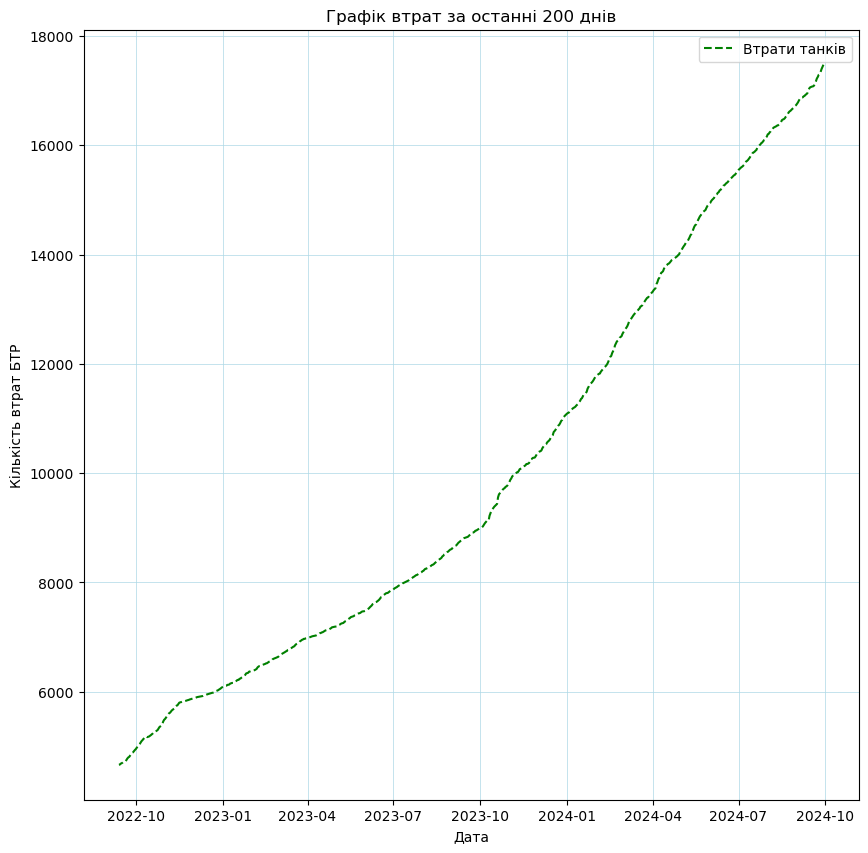

In [218]:
def create_plot(dates, values_array):
    last_200_days_dates = dates[:-200]
    last_200_days_values = values_array[:-200].astype(float)
    
    plt.figure(figsize=(10, 10), dpi=100)
    plt.plot(last_200_days_dates, last_200_days_values, linestyle='--', color='green', label='Втрати танків')
    plt.title('Графік втрат за останні 200 днів')
    plt.xlabel('Дата')
    plt.ylabel('Кількість втрат БТР')
    plt.grid(color='lightblue', linestyle='-', linewidth=0.5)
    plt.legend()
    plt.savefig('APC_losses_plot.png', format='png') 
    plt.show()

create_plot(dates_array, APC_data)
